In [25]:
import matplotlib.pyplot as plt

In [1]:
import rosbag

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [4]:
import sys

In [2]:
bag = rosbag.Bag('flight3.bag')

In [3]:
topics_imu = []
msgs_imu = []
t_imu = []
for topic, msg, t in bag.read_messages(topics=['/sonar_height']):
    topics_imu.append(topic)
    msgs_imu.append(msg)
    t_imu.append(t.to_sec())

In [8]:
for i in range(len(msgs_imu)):
    if msgs_imu[i].range == sys.float_info.min - 2*sys.float_info.epsilon:
        print("found collision at i = {}".format(i))

In [99]:
topics_state = []
msgs_state = []
t_state = []
for topic, msg, t in bag.read_messages(topics=['/indoor/status']):
    topics_state.append(topic)
    msgs_state.append(msg)
    t_state.append(t.to_sec())

In [102]:
msgs_state[0]

status: ''
tileDetected: 1
currentMission: 0
isFlying: False
droneConnected: True
altitude: 1000.0
robotBatteryLevel: 0
fmBatteryLevel: 0
state: 1
stateStr: "Docked"

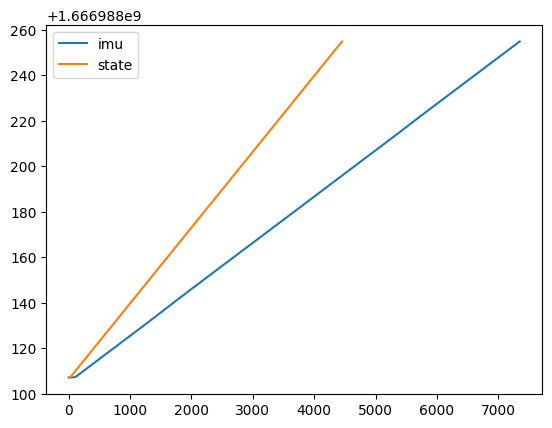

In [36]:
fig = plt.figure()
plt.plot(t_imu)
plt.plot(t_state)
plt.legend(['imu', 'state'])
plt.show()

In [42]:
t_s = []
for topic, msg, t in bag.read_messages():
    t_s.append(t.to_sec())

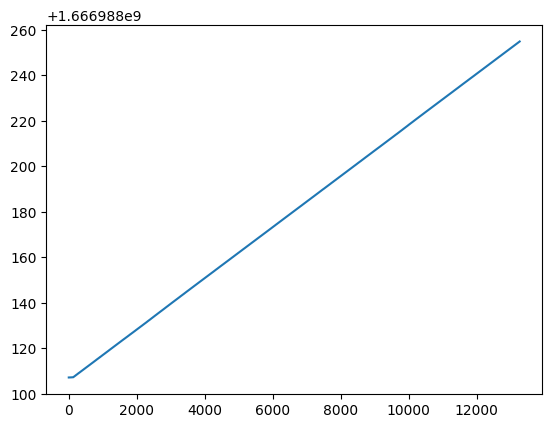

In [44]:
plt.plot(t_s)

In [89]:
from scipy.spatial.transform import Rotation as R

In [90]:
quat = [msgs_imu[0].orientation.x, msgs_imu[0].orientation.y, msgs_imu[0].orientation.z, msgs_imu[0].orientation.w]

In [91]:
r = R.from_quat(quat)

In [105]:
e = r.as_euler('xyz', degrees=True)

In [107]:
e[1]

-0.8849912926574016

In [1]:
import rosbag
from parse_utils import *

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
bag = rosbag.Bag('flight3.bag')

In [3]:
flight_info = parse_flight_data(bag)

In [4]:
in_flight_altitude = flight_info.state[flight_info.state["state"]==3].drop(["time", "state"], axis=1)

In [5]:
in_flight_altitude.head()

,altitude
239,2.580
240,2.515
241,2.515
242,2.364
243,2.364


In [7]:
import matplotlib.pyplot as plt

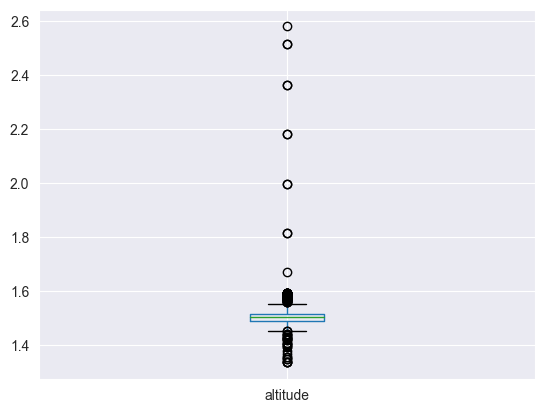

In [8]:
fig = plt.figure()
in_flight_altitude.boxplot()
plt.show()
#fig.savefig('./test.png')

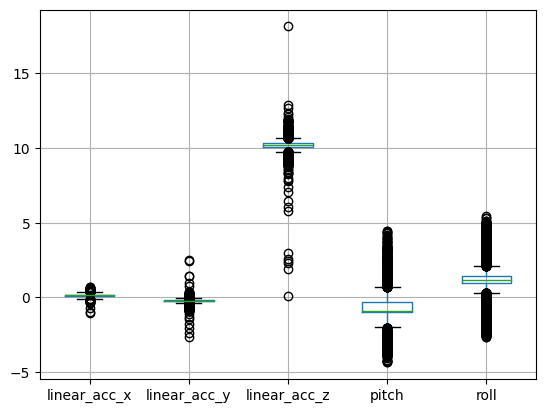

In [36]:
fig = plt.figure()
flight_info.imu.drop(["time", "state"], axis=1).boxplot()
plt.show()

In [37]:
flight_info.imu.drop(["time", "state"], axis=1).describe()

,linear_acc_x,linear_acc_y,linear_acc_z,pitch,roll
count,7416.000000,7416.000000,7416.000000,7416.000000,7416.000000
mean,0.124356,-0.213374,10.185532,-0.714129,1.182614
std,0.087088,0.137324,0.415172,0.928690,0.862535
min,-1.024450,-2.645674,0.119714,-4.349552,-2.644096
25%,0.057762,-0.256487,10.077727,-0.995426,0.975399
50%,0.128094,-0.210995,10.181952,-0.893128,1.189085
75%,0.183761,-0.167899,10.309448,-0.314515,1.429973
max,0.691945,2.478374,18.142916,4.464834,5.432026


In [38]:
import seaborn as sns

In [39]:
sns.violinplot(data=flight_info.imu.drop(["time", "state"], axis=1))

<AxesSubplot: >

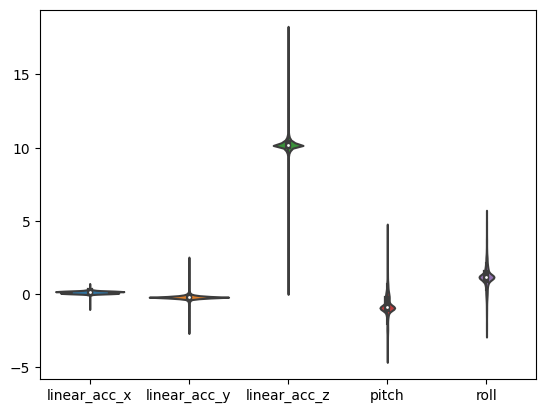

In [40]:
plt.show()